# Imersão de dados 03 - Alura

### Aluno: Guilherme Barros Alves Pereira

# Aula 04 - Merge de dados e análise de resultados

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

In [17]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression='zip')

mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [18]:
compostos = dados['composto'].value_counts().index[:5]

In [19]:
dados_resultado_endereço = 'https://raw.githubusercontent.com/alura-cursos/imersaodados3/main/dados/dados_resultados.csv'
dados_resultados = pd.read_csv(dados_resultado_endereço)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print(f'O tamanho dessa base de dados é: {dados_resultados.shape}')
print(f'A quantidade de dados nulos é: {dados_resultados.isna().sum().sum()}')

O tamanho dessa base de dados é: (23814, 207)
A quantidade de dados nulos é: 0


In [21]:
contagem_moa = dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [22]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [23]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [24]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [25]:
dados_combinados = pd.merge(dados, dados_resultados[['id', 'n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [26]:
dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].unique()

array([False])

In [27]:
dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

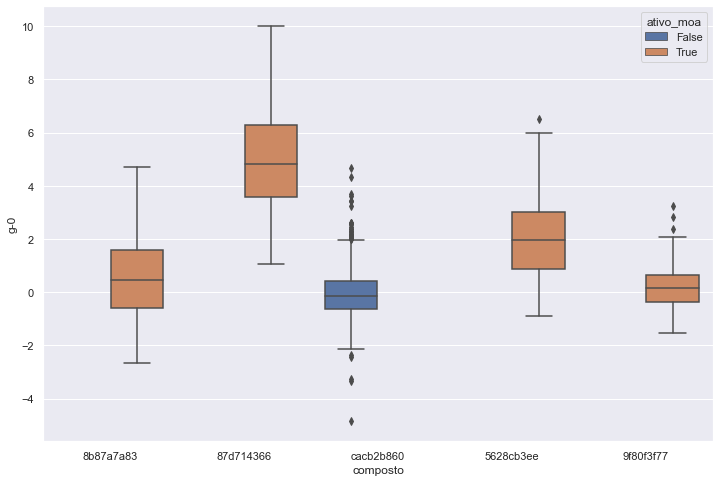

In [28]:
composto_principal = dados_combinados['composto'].value_counts().index[:5]
plt.figure(figsize=(12,8))
sns.boxplot(data=dados_combinados.query('composto in @composto_principal'), y='g-0', x='composto', hue='ativo_moa')
plt.show()

## Desafio 01: Encontrar o top 10, das ações do MOA (Inibidor, antagonista, ...)

In [29]:
contagem_moa2 = pd.DataFrame(dados_resultados.drop(['id', 'n_moa', 'ativo_moa'], axis=1).sum().sort_values(ascending=False), columns=['quantidade'])
contagem_moa2['tipo'] = [x.split('_')[-1] for x in contagem_moa2.index]
contagem_moa2.groupby('tipo').sum().sort_values(by='quantidade', ascending=False)[:10]

,quantidade
tipo,
inhibitor,9693
antagonist,3449
agonist,2330
blocker,323
agent,150
activator,115
local,80
antioxidant,73
anti-inflammatory,73


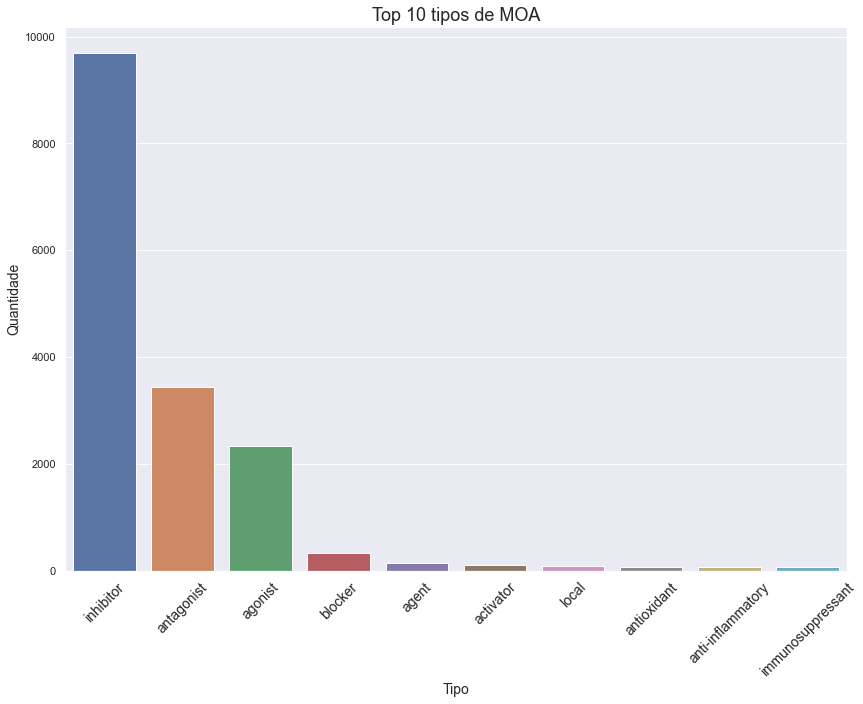

In [30]:
top_10_moas = contagem_moa2.groupby('tipo').sum().sort_values(by='quantidade', ascending=False)[:10].reset_index()
plt.figure(figsize=(14,10))
ax = sns.barplot(data=top_10_moas, y='quantidade', x='tipo')
ax.set_title('Top 10 tipos de MOA', fontsize=18)
ax.set_xlabel('Tipo', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=14)

for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

## Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == 'com_controle'

In [31]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [32]:
eh_controle = []
for index,row in dados_combinados.iterrows():
    eh_controle.append(True if row['tratamento'] == 'com_controle' else False)
dados_combinados['eh_controle'] = eh_controle

In [33]:
dados_combinados.tail()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,1,True,False
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,1,True,False
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,0,False,True
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,1,True,False
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520,0,False,False


## Desafio 03: Criar três colunas para indicar o tempo 24, 48 e 72

In [34]:
tempos = pd.get_dummies(dados_combinados['tempo'], prefix='tempo')
tempos.head()

,tempo_24,tempo_48,tempo_72
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [35]:
dados_combinados = pd.concat([dados_combinados, tempos], axis=1)
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle,tempo_24,tempo_48,tempo_72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.3981,0.2139,0.3801,0.4176,1,True,False,1,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.1522,0.1241,0.6077,0.7371,0,False,False,0,0,1
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,0,1,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,0,1,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.1094,0.2885,-0.3786,0.7125,1,True,False,0,0,1


## Desafio 04: Estudar sobre combinações de dataframes:
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

## Desafio 05: Fazer a analise mais detalhada considerando tempo e dose para comparar as distribuições (Escolher uma droga e comparar com controle)

In [36]:
selecao_composto = composto_principal[:2]

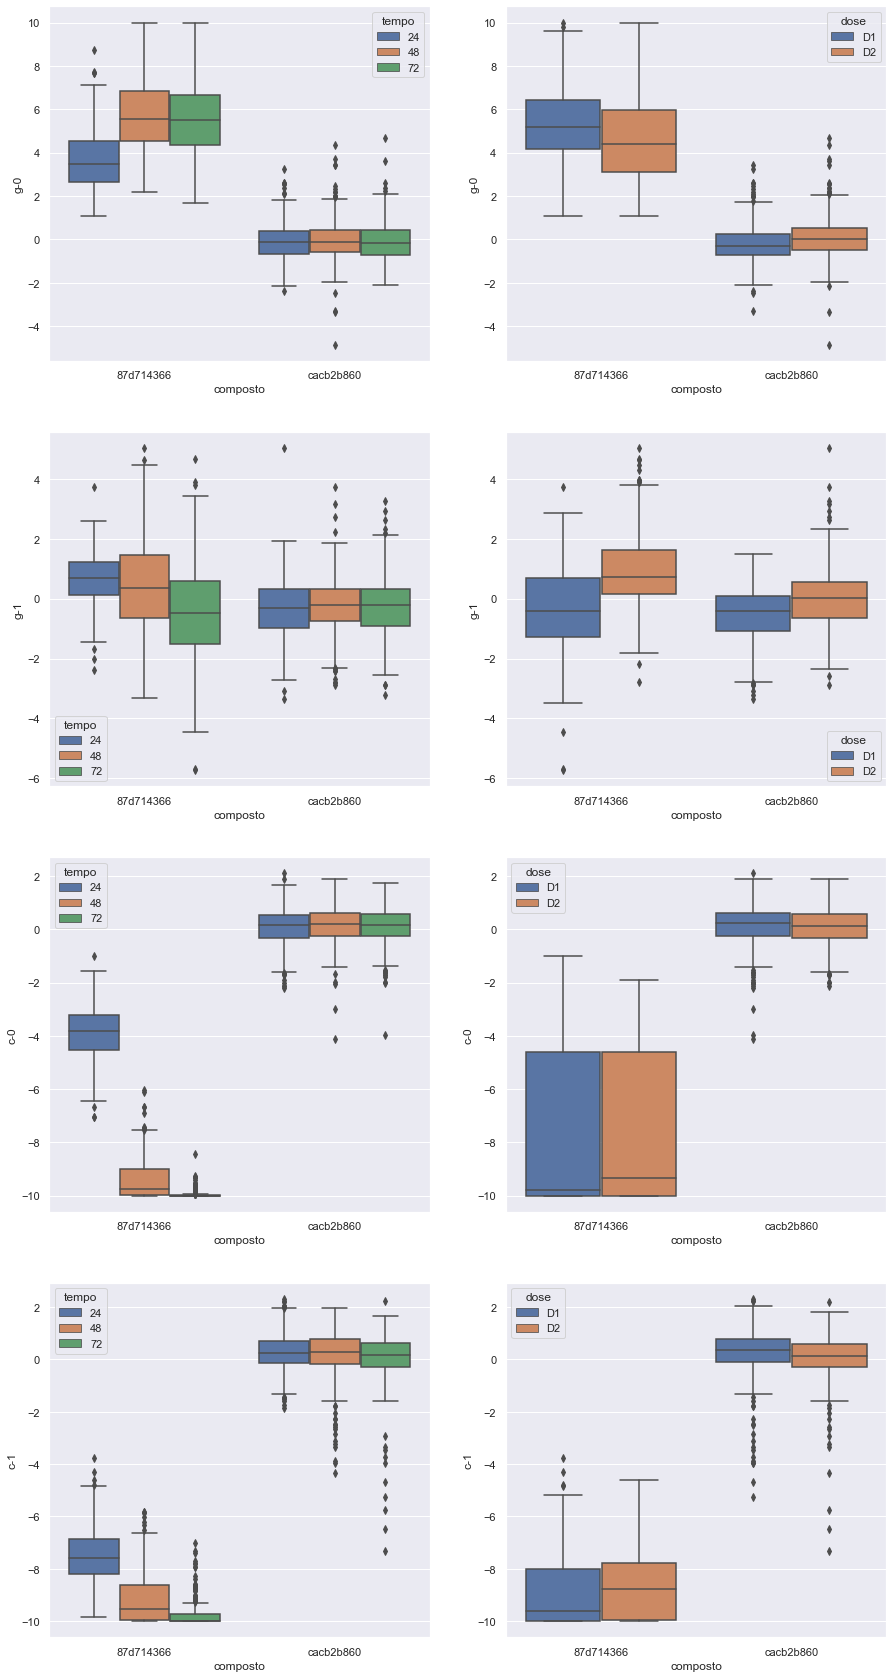

In [37]:
f, ax = plt.subplots(4, 2, figsize=(15,30))
sns.boxplot(data=dados_combinados.query('composto in @selecao_composto'), x='composto', y='g-0', hue='tempo', ax=ax[0,0])
sns.boxplot(data=dados_combinados.query('composto in @selecao_composto'), x='composto', y='g-0', hue='dose', ax=ax[0,1])
sns.boxplot(data=dados_combinados.query('composto in @selecao_composto'), x='composto', y='g-1', hue='tempo', ax=ax[1,0])
sns.boxplot(data=dados_combinados.query('composto in @selecao_composto'), x='composto', y='g-1', hue='dose', ax=ax[1,1])
sns.boxplot(data=dados_combinados.query('composto in @selecao_composto'), x='composto', y='c-0', hue='tempo', ax=ax[2,0])
sns.boxplot(data=dados_combinados.query('composto in @selecao_composto'), x='composto', y='c-0', hue='dose', ax=ax[2,1])
sns.boxplot(data=dados_combinados.query('composto in @selecao_composto'), x='composto', y='c-1', hue='tempo', ax=ax[3,0])
sns.boxplot(data=dados_combinados.query('composto in @selecao_composto'), x='composto', y='c-1', hue='dose', ax=ax[3,1])
plt.show()

## Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

In [38]:
dados_combinados1 = dados_combinados.copy()
dados_combinados1 = dados_combinados*1
dados_combinados1.query('composto in @composto_principal').groupby(by=['composto', 'dose', 'tempo']).mean()[['ativo_moa']]

ativo_moa
composto  dose tempo           
5628cb3ee D1   24             1
               48             1
               72             1
          D2   24             1
               48             1
               72             1
87d714366 D1   24             1
               48             1
               72             1
          D2   24             1
               48             1
               72             1
8b87a7a83 D1   24             1
               48             1
               72             1
          D2   24             1
               48             1
               72             1
9f80f3f77 D1   24             1
               48             1
               72             1
          D2   24             1
               48             1
               72             1
cacb2b860 D1   24             0
               48             0
               72             0
          D2   24             0
               48             0
               72             0

## Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

## Desafio 08: Resumir o que foi aprendido

Aprendi técnicas para fundir, juntar dois ou mais dataframes.

Como criar novas colunas com dataframes que trazem muitas informações para criar novos plots com informações uteis